In [4]:
import pathlib
import datetime
import warnings

from tqdm.notebook import tqdm

import shapely.geometry
import geopandas as gpd
import pandas as pd
import numpy as np
import movingpandas as mpd

import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates
import matplotlib.cm

plt.style.use('dark_background')

warnings.filterwarnings('ignore')

In [6]:
data_dir = pathlib.Path('/Users/baart_f/data/drought/ivs').expanduser()
processed_df = pd.read_csv(data_dir / 'ivs2022_reizen.csv')

In [10]:
def week2t(row):
    date_str = f"{row['jaar']}W{int(row['week']):02d}-0"
    t0 = datetime.datetime.strptime(date_str, "%YW%U-%w")
    return t0

processed_df['t'] = selected.apply(week2t, axis=1)


In [11]:
selected = processed_df[
    np.logical_and(
        processed_df['v40_1_herkomst_land'] == 'NL',
        processed_df['v41_1_bestemming_land'] == 'DE'
    )
]
selected = selected.query('week < 38')

In [12]:
rtm_de_df = selected.query('v40_2_herkomst_plaats == "RTM"').groupby(['t']).sum()[['reizen', 'lading']]

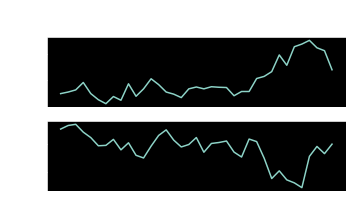

In [17]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(5, 3))
ax = axes[0]
ax.plot(rtm_de_df.index, rtm_de_df['reizen'])
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))    
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth=[1, 4, 7] ))
ax.set_ylabel('Trips [n]')
ax = axes[1]
ax.plot(rtm_de_df.index, rtm_de_df['lading'] / 1000)
ax.set_ylabel('Cargo / 1000')
fig.suptitle('Transport van Rotterdam naar Duitsland')
fig.tight_layout()
fig.savefig('/Users/baart_f/src/drought-scrolly/example/drought-scrolly/images/figures/ivs-trends2.png')

In [14]:
logchem_df = processed_df.query("v41_2_bestemming_plaats == 'GDO'").groupby(['t']).sum()[['reizen', 'lading']]

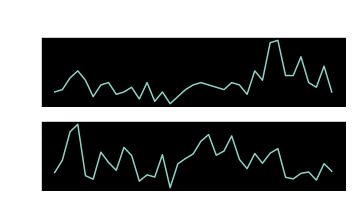

In [15]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(5, 3))
ax = axes[0]
ax.plot(logchem_df.index, logchem_df['reizen'])
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m'))    
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth=[1, 4, 7] ))
ax.set_ylabel('Trips [n]')
ax = axes[1]
ax.plot(logchem_df.index, logchem_df['lading'] / 1000)
ax.set_ylabel('Cargo / 1000')
fig.suptitle('Cargo transport from Rotterdam to Germany')
fig.tight_layout()

In [16]:
processed_df.query("v41_2_bestemming_plaats in ('GDO', 'DPH', 'HTW') and v41_1_bestemming_land == 'NL'")

,jaar,week,v40_1_herkomst_land,v40_2_herkomst_plaats,v41_1_bestemming_land,v41_2_bestemming_plaats,lading,reizen,beladen_lvm,t
39255,2022,14,FR,HQU,NL,GDO,1050.0,1,1447.0,NaT
48602,2022,17,FR,MZM,NL,GDO,2200.0,1,3239.0,NaT
110956,2022,38,FR,MZM,NL,GDO,1600.0,1,3239.0,NaT
